In [850]:
#To use multinomial data set to visualise the best used method or model 
#Logistic Regression -- 1 
#Random Forest -- 2 
#Decision Tree -- 3 
#Gaussian Naive Base -- 4 
#KNeighbors -- 5  
#SVM -- 6 
#ADaBoost -- 7  
#Gradient Boosting -- 8  
#Bagging -- 9  

In [1]:
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [852]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [853]:
#Reading the csv data file 
#Name: Blood Transfusion Centre- UCI 
data = pd.read_csv(r"C:\Users\Sandhya\Downloads\transfusion.csv")

In [854]:
#To change the name of the name of the columns in the given data
data=data.rename(columns={"whether he/she donated blood in March 2007":"Present"})
data=data.rename(columns={"Recency (months)":"Recent"})
data=data.rename(columns={"Frequency (times)":"Frequency"})
data=data.rename(columns={"Monetary (c.c. blood)":"AmountOfBlood"})
data=data.rename(columns={"Time (months)":"Months"})


# Data 

In [855]:
data.head()

,Recent,Frequency,AmountOfBlood,Months,Present
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


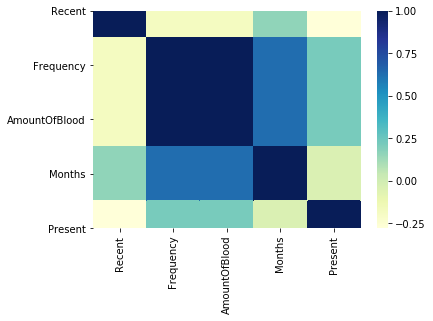

In [856]:
sns.heatmap(data.corr(),cmap="YlGnBu")

In [857]:
data = data.drop('Frequency',axis=1)

In [858]:
data = data.dropna(how='all')

In [859]:
data["Present"].value_counts()

0    570
1    178
Name: Present, dtype: int64

In [860]:
from sklearn.utils import resample
data_minority = data[data.Present==1]
data_majority = data[data.Present==0]

In [861]:
data_minority_upsampled = resample(data_minority, replace=True,n_samples=178,random_state=42)

In [862]:
data = pd.concat([data_majority, data_minority_upsampled])

In [863]:
data.Present.value_counts()

0    570
1    178
Name: Present, dtype: int64

In [864]:
data.sum

<bound method DataFrame.sum of      Recent  AmountOfBlood  Months  Present
4         1           6000      77        0
5         4           1000       4        0
7         1           3000      35        0
10        4           5750      58        0
11        0            750       4        0
..      ...            ...     ...      ...
551       2           1500      35        1
121       4           1250      26        1
475      26           1250      49        1
576       3           1000      29        1
287       9            500      16        1

[748 rows x 4 columns]>

In [865]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 4 to 287
Data columns (total 4 columns):
Recent           748 non-null int64
AmountOfBlood    748 non-null int64
Months           748 non-null int64
Present          748 non-null int64
dtypes: int64(4)
memory usage: 29.2 KB


In [866]:
data.describe()

,Recent,AmountOfBlood,Months,Present
count,748.000000,748.000000,748.000000,748.000000
mean,9.450535,1392.045455,34.312834,0.237968
std,8.047480,1419.160418,24.325129,0.426124
min,0.000000,250.000000,2.000000,0.000000
25%,3.000000,500.000000,16.000000,0.000000
50%,7.000000,1000.000000,28.000000,0.000000
75%,14.000000,1750.000000,50.000000,0.000000
max,74.000000,12500.000000,98.000000,1.000000


In [867]:
data.columns

Index(['Recent', 'AmountOfBlood', 'Months', 'Present'], dtype='object')

In [868]:
data["Present"].unique()

array([0, 1], dtype=int64)

In [869]:
#To define a variable 'features' that has all the columns except the boolean column 'Present'
features=data.drop("Present", axis=1)
#To define a variable 'target' that has the boolean column 'Present'
target = data["Present"]

In [870]:
#To define variables that split the data in the data gets into features,target and X and Y 
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.3,random_state=101)
#X_train variable has some rows of features to use for the train of the  machine 
#X_test variable has some rows of features to use for testing  
#Y_train variable has some rows of target to use for the train of the  machine 
#X_train variable has some rows of target to use for testing

In [871]:
features.head()

,Recent,AmountOfBlood,Months
4,1,6000,77
5,4,1000,4
7,1,3000,35
10,4,5750,58
11,0,750,4


In [872]:
#To find the rows and columns of the data set 
data.shape

(748, 4)

In [873]:
#To find the rows and columns of the training set 
X_train.shape

(523, 3)

In [874]:
#To find the rows and columns of the testing set 
X_test.shape

(225, 3)

In [875]:
data.drop

<bound method DataFrame.drop of      Recent  AmountOfBlood  Months  Present
4         1           6000      77        0
5         4           1000       4        0
7         1           3000      35        0
10        4           5750      58        0
11        0            750       4        0
..      ...            ...     ...      ...
551       2           1500      35        1
121       4           1250      26        1
475      26           1250      49        1
576       3           1000      29        1
287       9            500      16        1

[748 rows x 4 columns]>

# GRAPHICAL REPRESENTATION 

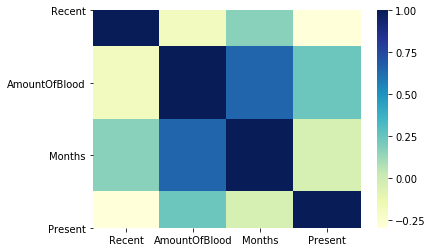

In [876]:
#To find the correlation between variables and visualising using colours in a heatmap
sns.heatmap(data.corr(),cmap="YlGnBu")

{'whiskers': [<matplotlib.lines.Line2D at 0x20f77900a48>,
 'caps': [<matplotlib.lines.Line2D at 0x20f77900e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f77900308>],
 'medians': [<matplotlib.lines.Line2D at 0x20f77905ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f77905e88>],
 'means': []}

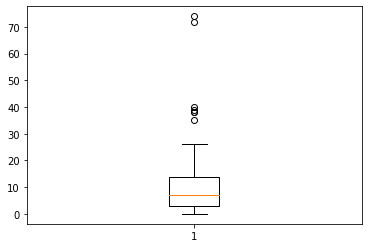

In [877]:
plt.boxplot(data.Recent)

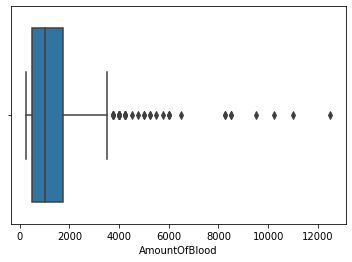

In [878]:
sns.boxplot(x=data['AmountOfBlood'])

# OUTLIERS 

In [879]:
def outlier_treatment(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range

In [880]:
lowerbound,upperbound = outlier_treatment(data.AmountOfBlood)
OutlierA= data[(data.AmountOfBlood < lowerbound) | (data.AmountOfBlood > upperbound)]
data.drop(data[ (data.AmountOfBlood > upperbound) | (data.AmountOfBlood < lowerbound) ].index , inplace=True)

In [881]:
lowerbound,upperbound = outlier_treatment(data.Recent)
OutlierR= data[(data.Recent < lowerbound) | (data.Recent> upperbound)]
#data.drop(data[ (data.Recent > upperbound) | (data.Recent < lowerbound) ].index , inplace=True)

In [882]:
lowerbound,upperbound = outlier_treatment(data.Months)
OutlierM= data[(data.Months < lowerbound) | (data.Months> upperbound)]
#data.drop(data[ (data.Months > upperbound) | (data.Months < lowerbound) ].index , inplace=True)

In [883]:
OutlierA.shape

(45, 4)

In [884]:
OutlierR.shape

(7, 4)

In [885]:
OutlierM.shape

(0, 4)

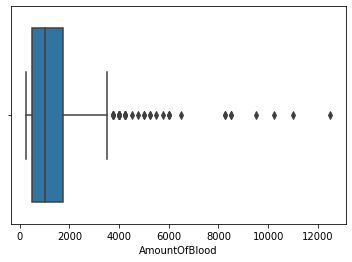

In [886]:
sns.boxplot(x=data['AmountOfBlood'])

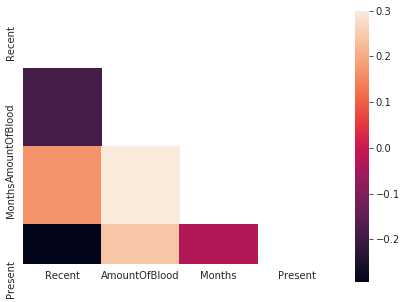

In [887]:
#To generate a mask for the upper triangle
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    #To set up the matplotlib figure
    f, ax = plt.subplots(figsize=(7, 5))
    #To draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(data.corr(), mask=mask, vmax=.3, square=True)

Text(0, 0.5, 'Present')

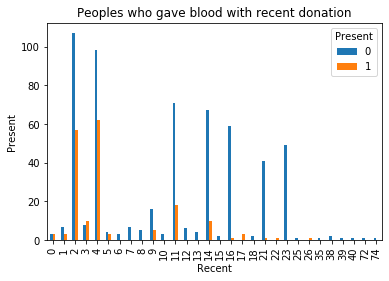

In [888]:
#To visualize how many people gave blood in March 2017 depending on their recent visits
%matplotlib inline
pd.crosstab(data.Recent,data.Present).plot(kind='bar')
plt.title('Peoples who gave blood with recent donation')
plt.xlabel('Recent')
plt.ylabel('Present')


(array([375., 205., 110.,  51.,   1.,   4.,   0.,   0.,   0.,   2.]),
 array([ 0. ,  7.4, 14.8, 22.2, 29.6, 37. , 44.4, 51.8, 59.2, 66.6, 74. ]),
 <a list of 10 Patch objects>)

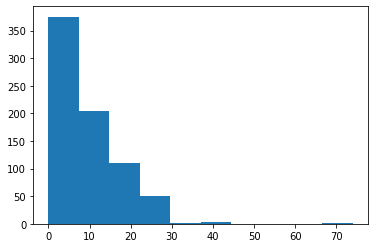

In [889]:
#To visualise using histograph on recency of the people's donation
plt.hist(data.Recent)

(array([472., 170.,  67.,  23.,   7.,   1.,   4.,   1.,   2.,   1.]),
 array([  250.,  1475.,  2700.,  3925.,  5150.,  6375.,  7600.,  8825.,
        10050., 11275., 12500.]),
 <a list of 10 Patch objects>)

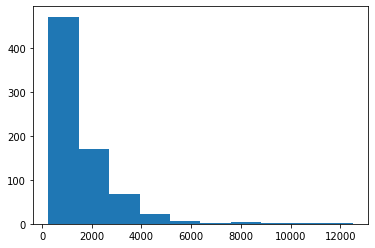

In [890]:
#To visualise using histograph on previous amount of blood donation
plt.hist(data.AmountOfBlood)

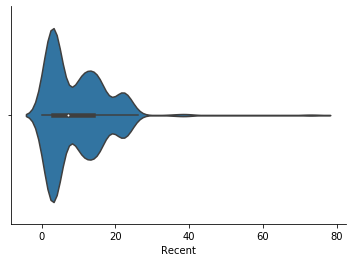

In [891]:
#To visualise the distribution of the data and its probability density using Violin plot for the column Recent 
sns.violinplot(data['Recent'])
sns.despine()
#We can conclude how frequently people are donating blood 

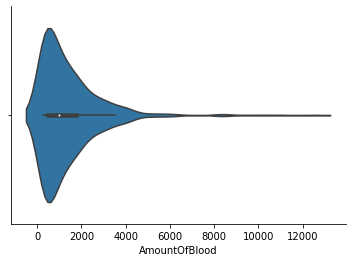

In [892]:
#To visualise the distribution of the data and its probability density using Violin plot for the column Amount of blood
sns.violinplot(data['AmountOfBlood'])
sns.despine()
#We can conclude how much amount of blood a person is willing to donate

# Logistic Regression -- 1

In [893]:
#Using variable modelLR for logistic Regression
modelLR = LogisticRegression()
#To fit this data of training set of X and Y to the model
modelLR.fit(X_train, Y_train)

C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy =  0.79 


C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

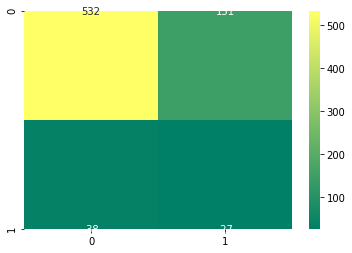

In [894]:
#To define the variable predLR to predict in boolean value based on the observation of the training case
predLR= modelLR.predict(X_test)
#To test how accurately the predition of LR matches with the original data set 
acc=accuracy_score(Y_test, predLR)
print("Accuracy =  {:.2f} ".format( acc))
y_pred = cross_val_predict(modelLR,features, target,cv=10)
#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap 

sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

ValueError: Found input variables with inconsistent numbers of samples: [523, 748]

In [787]:
#To show the pattern in which the output of the test cases
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [788]:
#To find the score by cross evaluation
result_LR = cross_val_score(modelLR,features, target, cv=10, scoring="accuracy" )
print("Cross val Score = {:.2f}".format(result_LR.mean()))

Cross val Score = 0.75


C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

The Accuracy =  0.7876497623722929


C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

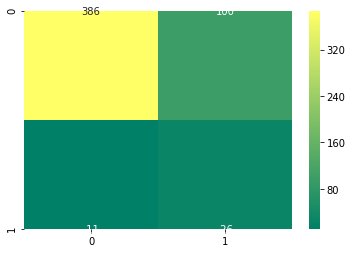

In [789]:
#To find the accuracy by cross evaluation in the training set 
trainresult_LR = cross_val_score(modelLR,X_train,Y_train,cv=10,scoring="accuracy")
print("The Accuracy = ", trainresult_LR.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelLR,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.7737154150197628


C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

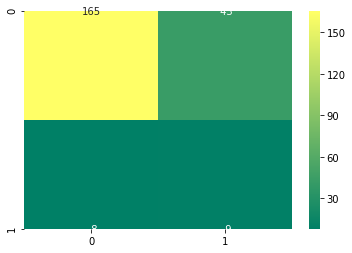

In [790]:
#To find the accuracy by cross evaluation in the testing set 
testresult_LR = cross_val_score(modelLR,X_test,Y_test,cv=10,scoring="accuracy")
print("The Accuracy = ", testresult_LR.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelLR,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

# Random Forest -- 2

In [791]:
#Using variable modelLR for Random Forest 
modelRF = RandomForestClassifier(n_estimators=700)

In [792]:
#To fit this data of training set of X and Y to the model
modelRF.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy =  0.8444444444444444


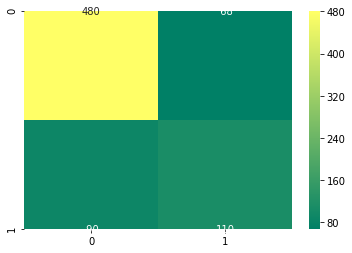

In [793]:
#To define the variable predRF to predict in boolean value 
predRF= modelRF.predict(X_test)
#To test how accurately the predition of RF matches with the original data set
acc=accuracy_score(Y_test, predRF)
print("Accuracy = ", acc)
#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelRF,features, target,cv=10)
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

In [794]:
#To find the score by cross evaluation
result_RF = cross_val_score(modelRF,features, target, cv=10, scoring="accuracy" )
print("Cross val Score ", result_RF.mean())

Cross val Score  0.7917297297297297


The Accuracy =  0.8167278522439455


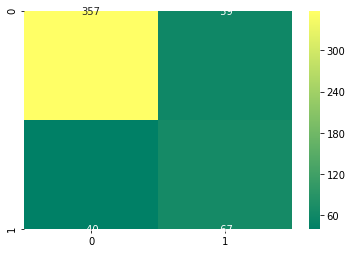

In [795]:
#To find the accuracy by cross evaluation in the training set 
trainresult_RF = cross_val_score(modelRF,X_train,Y_train,cv=10,scoring="accuracy")
print("The Accuracy = ", trainresult_RF.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelRF,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.7549901185770752


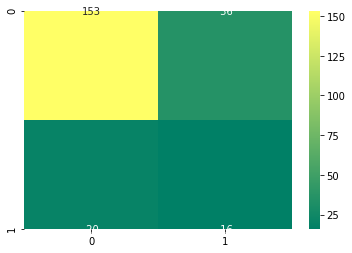

In [796]:
#To find the accuracy by cross evaluation in the testing set
testresult_RF = cross_val_score(modelRF,X_test,Y_test,cv=10,scoring="accuracy")
print("The Accuracy = ", testresult_RF.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelRF,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

# Decision Tree -- 3

In [797]:
#Using variable modelDT for Decision Tree
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier(criterion="gini", min_samples_split=10, min_samples_leaf=1,max_features="auto")
#To fit this data of training set of X and Y to the model
modelDT.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [798]:
#To define the variable pred_Tree to predict in boolean value 
pred_Tree = modelDT.predict(X_test)
#To test how accurately the predition of LR matches with the original data set
accDT= accuracy_score(pred_Tree, Y_test)
print("Accuracy = {:.2}".format(accDT))

Accuracy = 0.83


In [799]:
#To use k-Fold for cross validation Cross-Validation
kfold = KFold(n_splits=10, random_state=22)
result_tree = cross_val_score(modelDT,features, target, cv=10, scoring="accuracy" )
print("Result of mean using K-fold {:.2}".format(result_tree.mean()))

Result of mean using K-fold 0.76


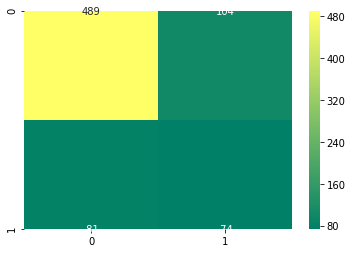

In [800]:
#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelDT,features,target,cv=10)
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

0.808923845300094


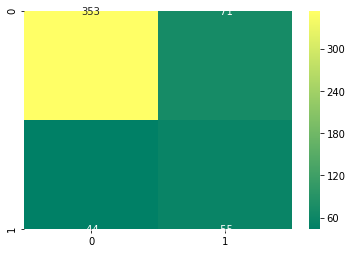

In [801]:
#To find the accuracy by cross evaluation in the training set 
trainresult_tree = cross_val_score(modelDT,X_train, Y_train, cv=10, scoring="accuracy" )
print(trainresult_tree.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelDT,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")

0.742094861660079


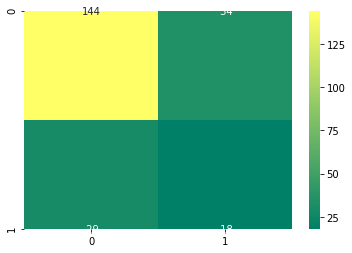

In [802]:
#To find the accuracy by cross evaluation in the testing set
testresult_tree = cross_val_score(modelDT,X_test, Y_test, cv=10, scoring="accuracy" )
print(testresult_tree.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelDT,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

# Gaussian Naive Base -- 4

Accuracy  0.7822222222222223
cross val score  0.7675495495495496


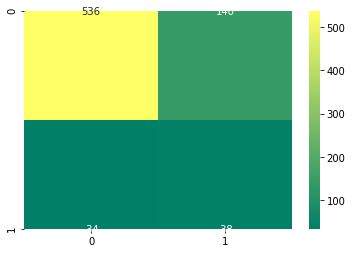

In [803]:
#Using variable modelNB for Gaussian Naive Base  
modelNB = GaussianNB()
#To fit this data of training set of X and Y to the model
modelNB.fit(X_train,Y_train)
#To define the variable pred_nb to predict in boolean value 
pred_nb = modelNB.predict(X_test)
acc1 = accuracy_score(pred_nb, Y_test)
print("Accuracy ", acc1)

#To find the score by cross evaluation
result_NB = cross_val_score(modelNB, features, target, cv=10,scoring="accuracy")
print("cross val score ", result_NB.mean())

#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap 

y_pred = cross_val_predict(modelNB, features, target,cv=10)
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.7627529241014257


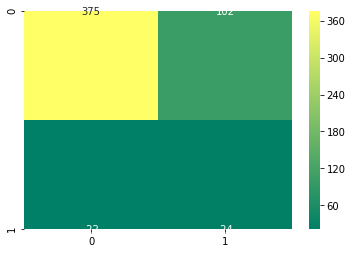

In [804]:
#To find the accuracy by cross evaluation in the training set 
trainresult_NB = cross_val_score(modelNB,X_train,Y_train,cv=10,scoring="accuracy")
print("The Accuracy = ", trainresult_NB.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelNB,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.7828063241106719


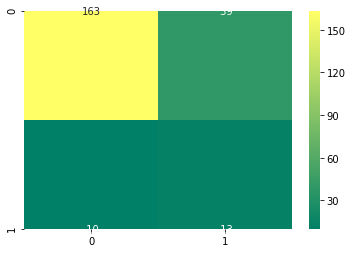

In [805]:
#To find the accuracy by cross evaluation in the testing set
testresult_NB = cross_val_score(modelNB,X_test,Y_test,cv=10,scoring="accuracy")
print("The Accuracy = ", testresult_NB.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelNB,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

# KNC -- 5

The Accuracy =  0.7955555555555556
The cross val score =  0.7567747747747748


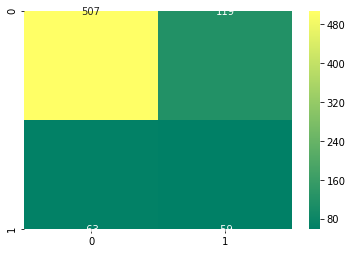

In [806]:
#Using variable modelKN for KNC
modelKN = KN(n_neighbors =4)
#To fit this data of training set of X and Y to the model
modelKN.fit(X_train,Y_train)
#To define the variable pred_Knn to predict in boolean value 
pred_Knn = modelKN.predict(X_test)
#To test how accurately the predition of LR matches with the original data set
acc1= accuracy_score(pred_Knn,Y_test)
print("The Accuracy = ", acc1)
#To find the score by cross evaluation
result_knn= cross_val_score(modelKN,features,target,cv=10,scoring="accuracy")
print("The cross val score = ", result_knn.mean())
#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelKN,features, target,cv=10)
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.7954189077662995


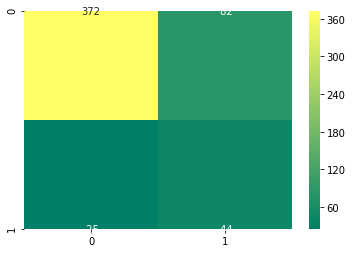

In [807]:
#To find the accuracy by cross evaluation in the training set 
trainresult_KN = cross_val_score(modelKN,X_train,Y_train,cv=10,scoring="accuracy")
print("The Accuracy = ", trainresult_KN.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelKN,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.7638833992094862


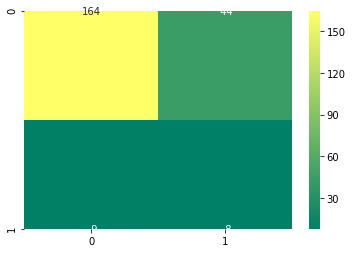

In [808]:
#To find the accuracy by cross evaluation in the testing set
testresult_KN = cross_val_score(modelKN,X_test,Y_test,cv=10,scoring="accuracy")
print("The Accuracy = ", testresult_KN.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelKN,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

In [809]:
pred03=modelKN.predict(X_train)

In [810]:
pred04=modelKN.predict(X_test)

In [811]:
accKN=[]
for i in range(3,100,3):
    model = KN(n_neighbors=i)
    model.fit(X_train, Y_train)
    train_acc = np.mean(pred03 == Y_train)
    test_acc = np.mean(pred04== Y_test)
    accKN.append([train_acc, test_acc])

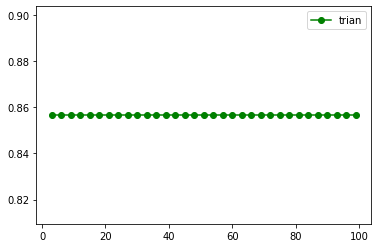

In [812]:
plt.plot(np.arange(3,100,3),[i[0] for i in accKN], "go-")
plt.legend(["trian", "test"])

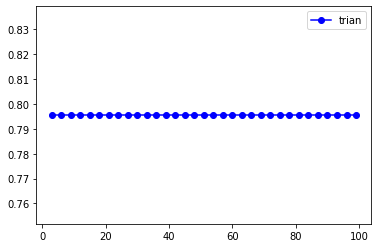

In [813]:
plt.plot(np.arange(3,100,3),[i[1] for i in accKN], "bo-")
plt.legend(["trian", "test"])

# SVC -- 6

C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

Accuracy 0.8577777777777778


C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

Cross_val score 0.8303243243243245


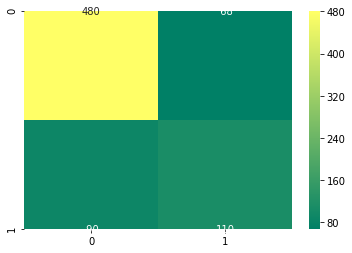

In [814]:
#Using variable modelSV for Support Vector Machine
modelSV = SVC()
#To fit this data of training set of X and Y to the model
modelSV.fit(X_train,Y_train)
#To define the variable pred_svm to predict in boolean value 
pred_svm = modelSV.predict(X_test)

#To test how accurately the predition of SVM matches with the original data set
acc1 =accuracy_score(pred_svm, Y_test)
print("Accuracy" , acc1)

#To find the score by cross evaluation
result_svm = cross_val_score(modelSV, features,target,cv=10, scoring = "accuracy")
print("Cross_val score", result_svm.mean())

#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelRF,features,target, cv=10)
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

The Accuracy =  0.8338206835709612


C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

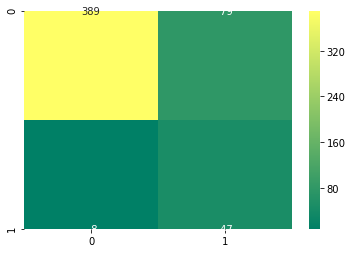

In [815]:
#To find the accuracy by cross evaluation in the training set 
trainresult_SV = cross_val_score(modelSV,X_train,Y_train,cv=10,scoring="accuracy")
print("The Accuracy = ", trainresult_SV.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelSV,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")


C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sandhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

The Accuracy =  0.763866930171278


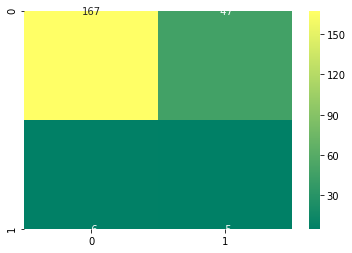

In [816]:
#To find the accuracy by cross evaluation in the testing set
testresult_SV = cross_val_score(modelSV,X_test,Y_test,cv=10,scoring="accuracy")
print("The Accuracy = ", testresult_SV.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelSV,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

# AdaBoost -- 7

Acc =  0.8044444444444444
Cross val score  0.7756036036036035


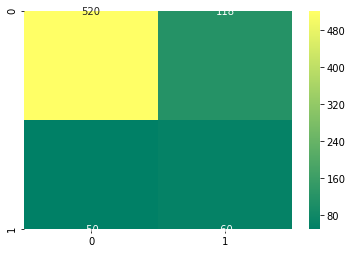

In [817]:
#Using variable modelAB for AdaBoost
modelAB = AdaBoostClassifier()
#To fit this data of training set of X and Y to the model
modelAB.fit(X_train,Y_train)
#To define the variable pred_AB to predict in boolean value 
pred_AB = modelAB.predict(X_test)
#To test how accurately the predition of AB matches with the original data set
acc1 = accuracy_score(pred_AB, Y_test)
print("Acc = ", acc1)
#To find the score by cross evaluation
result_AB = cross_val_score(modelAB, features,target, cv=10, scoring="accuracy")
print("Cross val score ", result_AB.mean())
#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelAB, features, target, cv=10)
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.7856135632772703


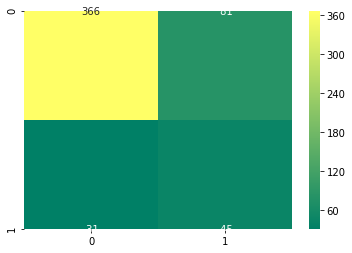

In [818]:
#To find the accuracy by cross evaluation in the training set 
trainresult_AB = cross_val_score(modelAB,X_train,Y_train,cv=10,scoring="accuracy")
print("The Accuracy = ", trainresult_AB.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelAB,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.7420783926218709


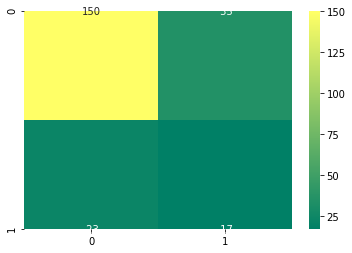

In [819]:
#To find the accuracy by cross evaluation in the testing set
testresult_AB = cross_val_score(modelAB,X_test,Y_test,cv=10,scoring="accuracy")
print("The Accuracy = ", testresult_AB.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelAB,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

# Gradient Boosting -- 8

The accuracy  0.8177777777777778
cross val score  0.776918918918919


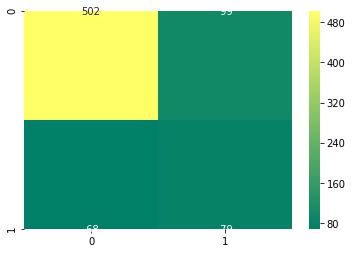

In [820]:
#Using variable modelGB for Gradient Boosting
modelGB =GradientBoostingClassifier()
#To fit this data of training set of X and Y to the model
modelGB.fit(X_train, Y_train)
#To define the variable pred_gb to predict in boolean value
pred_gb = modelGB.predict(X_test)
#To test how accurately the predition of GB matches with the original data set
acc1 = accuracy_score(pred_gb, Y_test)
print("The accuracy ", acc1)

#To find the score by cross evaluation
result_GB = cross_val_score(modelGB, features, target, cv=10, scoring="accuracy")
print("cross val score ", result_GB.mean())

#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelGB, features, target, cv=10)
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.7970837246364438


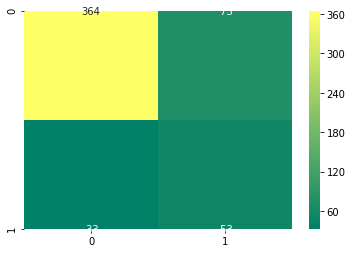

In [821]:
#To find the accuracy by cross evaluation in the training set 
trainresult_GB = cross_val_score(modelGB,X_train,Y_train,cv=10,scoring="accuracy")
print("The Accuracy = ", trainresult_GB.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelGB,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.7282773386034255


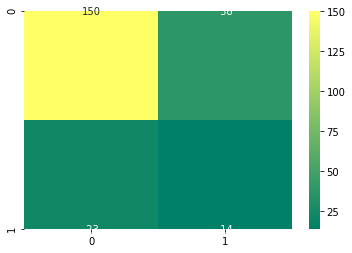

In [822]:
#To find the accuracy by cross evaluation in the testing set
testresult_GB = cross_val_score(modelGB,X_test,Y_test,cv=10,scoring="accuracy")
print("The Accuracy = ", testresult_GB.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelGB,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

# Bagging -- 9 

In [823]:
#Using variable modelBC for Bagging Classification
modelBC = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
#To fit this data of training set of X and Y to the model
modelBC.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
       

The accuracy  0.8444444444444444
cross val score  0.7837297297297298


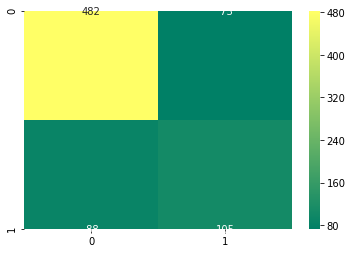

In [824]:
#To define the variable pred_bc to predict in boolean value
pred_bc = modelBC.predict(X_test)
#To test how accurately the predition of BC matches with the original data set
acc1 = accuracy_score(pred_bc, Y_test)
print("The accuracy ", acc1)

#To find the score by cross evaluation
result_BC = cross_val_score(modelBC, features, target, cv=10, scoring="accuracy")
print("cross val score ", result_BC.mean())
#To use a confusion matrix to describe the performance of a classification model 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelBC, features, target, cv=10)
sns.heatmap(confusion_matrix(y_pred,target),cmap="summer",annot=True,fmt="3.0f")



The Accuracy =  0.7993041919235038


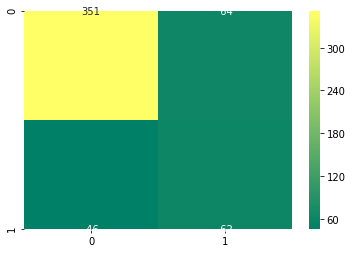

In [825]:
#To find the accuracy by cross evaluation in the training set 
trainresult_BC = cross_val_score(modelBC,X_train,Y_train,cv=10,scoring="accuracy")
print("The Accuracy = ", trainresult_BC.mean())
#To use a confusion matrix to describe the performance of the trained result 
#Graphical representation using colour coded heatmap 
y_pred = cross_val_predict(modelBC,X_train,Y_train,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_train),cmap="summer",annot=True,fmt="3.0f")

The Accuracy =  0.7282773386034256


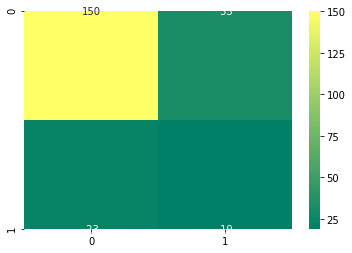

In [826]:
#To find the accuracy by cross evaluation in the testing set
testresult_BC = cross_val_score(modelBC,X_test,Y_test,cv=10,scoring="accuracy")
print("The Accuracy = ", testresult_BC.mean())
#To use a confusion matrix to describe the performance of a testing set 
#Graphical representation using colour coded heatmap
y_pred = cross_val_predict(modelBC,X_test,Y_test,cv=10)
sns.heatmap(confusion_matrix(y_pred,Y_test),cmap="summer",annot=True,fmt="3.0f")

# MODELS

In [827]:
#To make a dataframe to compare the accuracy of the different methods used to predict the dataset 
models= pd.DataFrame({ 
"Model" : ["Logical Regression","Decision Tree", "Random Forest", "Support Vector Machine", "KNN" , "Naive Bayes", "Ada Boost", "Gradient Boost","Bagging"],
"FullScore" : [result_LR.mean(),result_tree.mean(),result_RF.mean(),result_svm.mean(), result_knn.mean(), result_NB.mean(), result_AB.mean(), result_GB.mean(),result_BC.mean()],
"TrainScore": [trainresult_LR.mean(),trainresult_tree.mean(), trainresult_RF.mean(), trainresult_SV.mean(), trainresult_KN.mean(), trainresult_NB.mean(), trainresult_AB.mean(), trainresult_GB.mean(),trainresult_BC.mean()],
"TestScore" : [testresult_LR.mean(),testresult_tree.mean(), testresult_RF.mean(), testresult_SV.mean(), testresult_KN.mean(), testresult_NB.mean(), testresult_AB.mean(), testresult_GB.mean(),testresult_BC.mean()]
})


In [828]:
models.head()

,Model,FullScore,TrainScore,TestScore
0,Logical Regression,0.747477,0.787650,0.773715
1,Decision Tree,0.763586,0.808924,0.742095
2,Random Forest,0.791730,0.816728,0.754990
3,Support Vector Machine,0.830324,0.833821,0.763867
4,KNN,0.756775,0.795419,0.763883


In [829]:
#To order the models by ascending order of their FullScore
models.sort_values(by="FullScore")

,Model,FullScore,TrainScore,TestScore
0,Logical Regression,0.747477,0.787650,0.773715
4,KNN,0.756775,0.795419,0.763883
1,Decision Tree,0.763586,0.808924,0.742095
5,Naive Bayes,0.767550,0.762753,0.782806
6,Ada Boost,0.775604,0.785614,0.742078
7,Gradient Boost,0.776919,0.797084,0.728277
8,Bagging,0.783730,0.799304,0.728277
2,Random Forest,0.791730,0.816728,0.754990
3,Support Vector Machine,0.830324,0.833821,0.763867


In [830]:
#To order the models by ascending order of their TrainScore
models.sort_values(by="TrainScore")

,Model,FullScore,TrainScore,TestScore
5,Naive Bayes,0.767550,0.762753,0.782806
6,Ada Boost,0.775604,0.785614,0.742078
0,Logical Regression,0.747477,0.787650,0.773715
4,KNN,0.756775,0.795419,0.763883
7,Gradient Boost,0.776919,0.797084,0.728277
8,Bagging,0.783730,0.799304,0.728277
1,Decision Tree,0.763586,0.808924,0.742095
2,Random Forest,0.791730,0.816728,0.754990
3,Support Vector Machine,0.830324,0.833821,0.763867


In [831]:
#To order the models by ascending order of their TestScore
models.sort_values(by="TestScore")

,Model,FullScore,TrainScore,TestScore
7,Gradient Boost,0.776919,0.797084,0.728277
8,Bagging,0.783730,0.799304,0.728277
6,Ada Boost,0.775604,0.785614,0.742078
1,Decision Tree,0.763586,0.808924,0.742095
2,Random Forest,0.791730,0.816728,0.754990
3,Support Vector Machine,0.830324,0.833821,0.763867
4,KNN,0.756775,0.795419,0.763883
0,Logical Regression,0.747477,0.787650,0.773715
5,Naive Bayes,0.767550,0.762753,0.782806


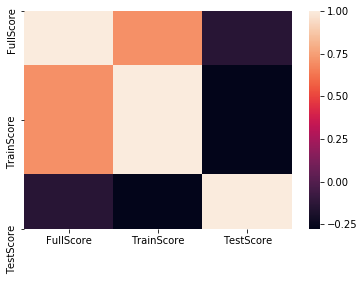

In [832]:
#To Graphical represent the models using colour coded heatmap
sns.heatmap(models.corr()) 

Text(0, 0.5, 'FullScore Accuracy')

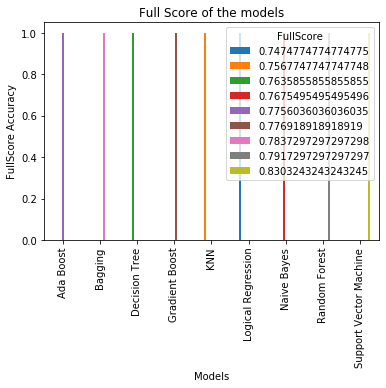

In [833]:
%matplotlib inline
pd.crosstab(models.Model,models.FullScore).plot(kind='bar')
plt.title('Full Score of the models')
plt.xlabel('Models')
plt.ylabel('FullScore Accuracy')

In [834]:
trainedforest = RandomForestClassifier(n_estimators=700).fit(features,target)

In [835]:
pickle.dump(trainedforest, open('model.pkl','wb'))

In [836]:
model = pickle.load(open('model.pkl','rb'))

In [838]:
print(model.predict([[2, 10350,  86]]))

[1]


In [839]:
p = model.predict(X_test)
#print(X_Test)
print(list(p).count(1))
print(list(p).count(0))

44
181


In [840]:
data.shape

(703, 4)